<a href="https://colab.research.google.com/github/bforoura/IDS/blob/main/random_forest_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning: Random Forest Classification**

### **Competition on the Titanic Dataset**

* The **training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

* The **test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### **Data Dictionary**
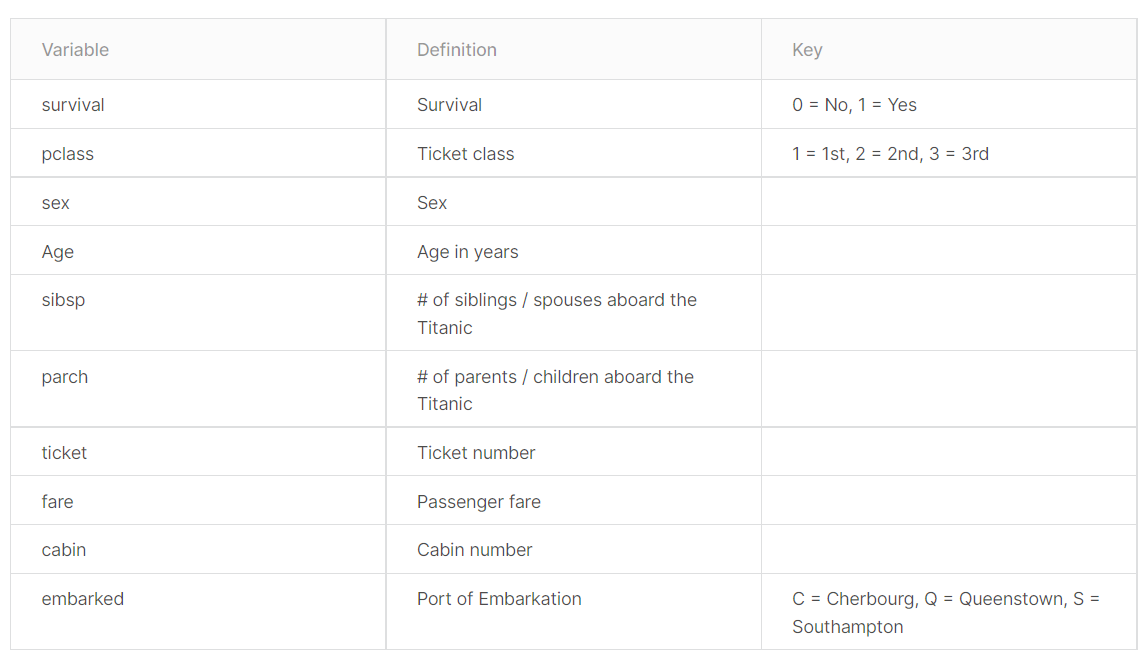

### **Features**
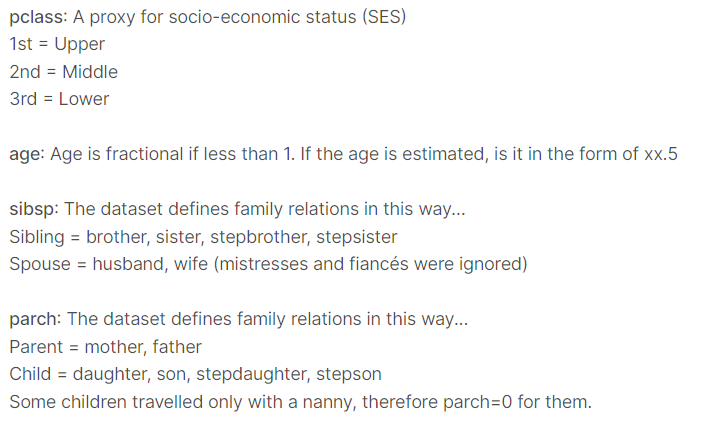


In [1]:
# Install the needed mahine learning packages
# This takes long to install so be patient

install.packages("caret", dependencies = TRUE)
install.packages("randomForest")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘fastmatch’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘ParamHelpers’, ‘BBmisc’, ‘checkmate’, ‘parallelMap’, ‘XML’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mlr’, ‘doParallel’, ‘FNN’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘ROSE’, ‘unbalanced’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘resha

In [2]:
# Let's read in the data files

library(readr)
library(caret)
library(randomForest)

trainingDF <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/titanic_training.csv")
testDF <- read.csv("https://raw.githubusercontent.com/bforoura/IDS/main/titanic_test.csv")





Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
# Convert to data frame and summarize 

summary(trainingDF)



  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## **Accessing Rows**

In [4]:
# The first 10 rows

head(trainingDF, 10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


### **Shape and Names of Columns**

In [5]:
# shape of the data frame

dim(trainingDF)




[1] 891  12

In [6]:
# Column names

# names(bank_data)
colnames(trainingDF)



[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

In [7]:
# Describe the structure of the data frame

str(trainingDF)



'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


## **Cross-Tabulations**

* From the results we can conclude that **Pclass** could be a useful predictor of **Survived**. 

* This is because, the first column of the cross-tab shows that, of the passengers in Class 1, 136 survived and 80 died (i.e. 63% of first-class passengers survived). 

* On the other hand, in Class 2, 87 survived and 97 died (i.e. only 47% of second class passengers survived). 

* Finally, in Class 3, 119 survived and 372 died (i.e. only 24% of third-class passengers survived). 

* This means that there’s an obvious relationship between the passenger class and the survival chances.

In [8]:
# Let's examine Survived vs. Pclass

# This is another way of doing it
# mytable <- table(trainingDF[, c('Survived', 'Pclass')])

mytable <- table(trainingDF$Survived, trainingDF$Pclass)
mytable



   
      1   2   3
  0  80  97 372
  1 136  87 119


## **Conditional Boxplots**

* We can use **conditional boxplots** to compare the distribution of each continuous variable, conditioned on whether the passengers survived or not

* The box plot of **Age** for people who survived and who didn’t is nearly the same. This means that **Age** of a person did not have a large effect on whether one **survived** or not.

* The boxplot for **Fares**, however, is much different for those who survived and those who didn’t. 






In [9]:
install.packages("fields")
library(fields)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘gridExtra’, ‘spam’, ‘viridis’, ‘maps’


Loading required package: spam

Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Attaching package: ‘spam’


The following objects are masked from ‘package:base’:

    backsolve, forwardsolve


Loading required package: viridis

Loading required package: viridisLite


Try help(fields) to get started.



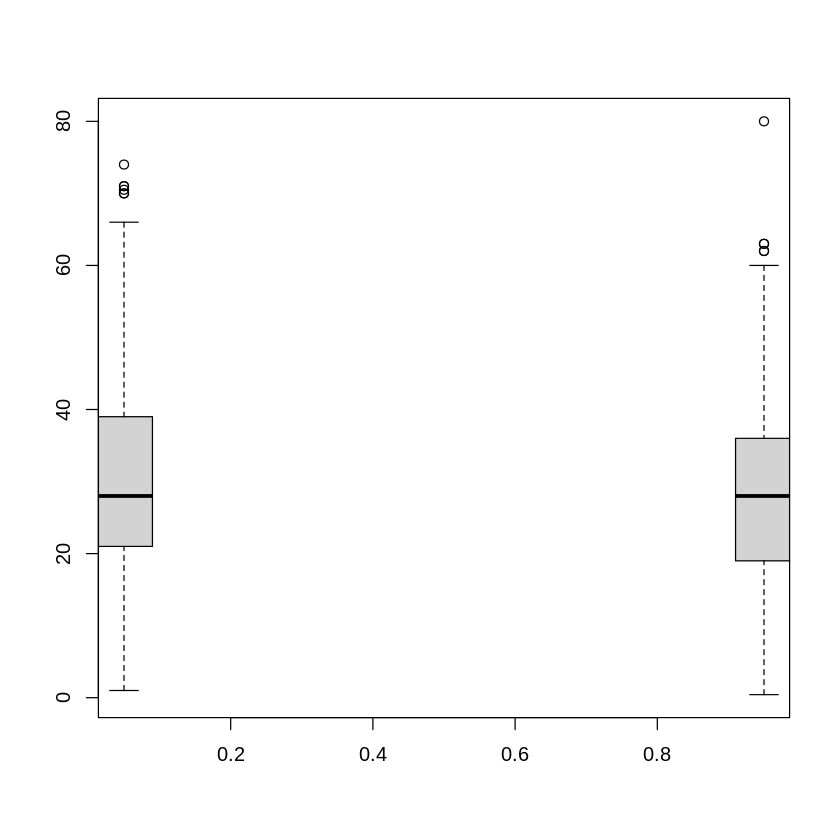

In [ ]:
# Age (Y) vs. Survived (X)

bplot.xy(trainingDF$Survived, trainingDF$Age)




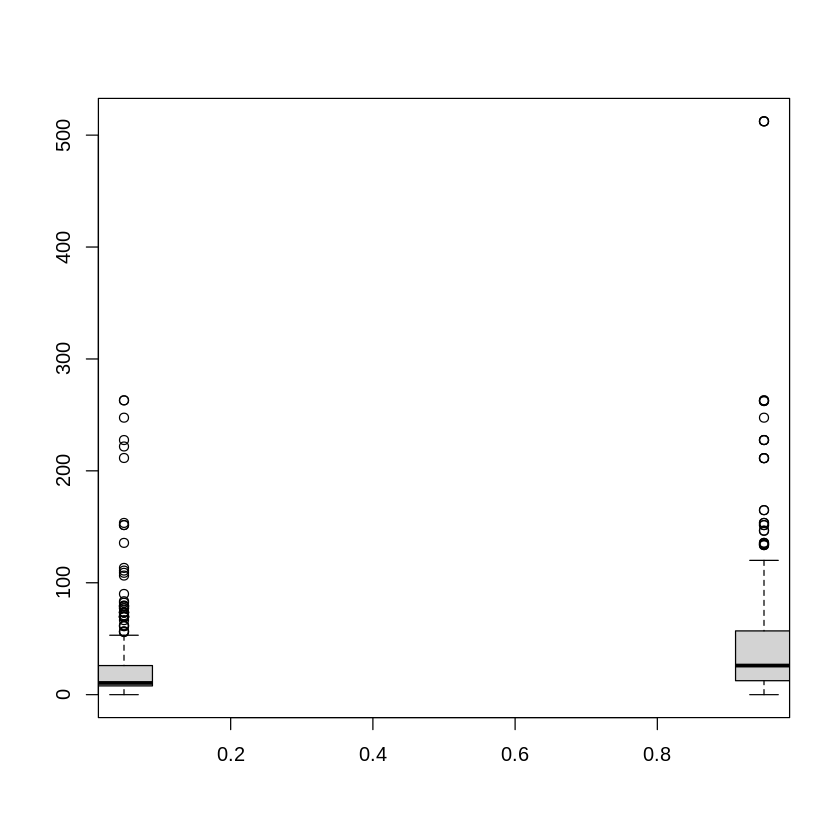

In [10]:
# Fare (Y) vs. Survived (X)

bplot.xy(trainingDF$Survived, trainingDF$Fare)



### **Any Missing Values?**

In [11]:
# Does $Age have any missing values?

# is.na(trainingDF$Age) returns a vector, e.g., (F, F, F, T, F, ...)
sum(is.na(trainingDF$Age))



[1] 177

In [12]:
# Install and load Hmisc

install.packages("Hmisc")
library(Hmisc)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘htmlwidgets’, ‘latticeExtra’, ‘htmlTable’


Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following object is masked from ‘package:fields’:

    describe


The following objects are masked from ‘package:base’:

    format.pval, units




### **Impute Missing Age Values**

In [13]:
# impute missing values with the median value (default)
trainingDF$Age_imputed <- with(trainingDF, impute(Age, median))



In [14]:
# Checking to makes sure the NA values have been removed

summary(trainingDF)





 177 values imputed to 28 



  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## **Random Forest**

* We need to convert **Survived** to a **factor**

In [15]:
# Converting ‘Survived’ to a factor
trainingDF$Survived <- factor(trainingDF$Survived)

# Set a random seed
set.seed(51)



In [16]:
summary(trainingDF)




 177 values imputed to 28 



  PassengerId    Survived     Pclass          Name               Sex           
 Min.   :  1.0   0:549    Min.   :1.000   Length:891         Length:891        
 1st Qu.:223.5   1:342    1st Qu.:2.000   Class :character   Class :character  
 Median :446.0            Median :3.000   Mode  :character   Mode  :character  
 Mean   :446.0            Mean   :2.309                                        
 3rd Qu.:668.5            3rd Qu.:3.000                                        
 Max.   :891.0            Max.   :3.000                                        
                                                                               
      Age            SibSp           Parch           Ticket         
 Min.   : 0.42   Min.   :0.000   Min.   :0.0000   Length:891        
 1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :28.00   Median :0.000   Median :0.0000   Mode  :character  
 Mean   :29.70   Mean   :0.523   Mean   :0.3816                     
 3rd Qu.:38.00 

## **Train the RF Model**

In [40]:
                 # Survived is a function of the selected independent parameters
RFmodel <- train(Survived ~ Pclass + Sex + SibSp + Embarked + Parch + Fare, 

                 # Use the train data frame as the training data
                 data = trainingDF, 

                 # Use the 'random forest' algorithm
                 method = 'rf',

                 # RMSE, Accuracy, Kappa, RSquared, ...
                 metric="Accuracy",

                # Use 10-fold cross-validation, randomly (vs. grid) repeat each experiment 3 times
                 trControl = trainControl(method="repeatedcv", number=10, repeats=3, search="random"))
                 



### **Model Summary**

 
*  **mtry** is a hyper-parameter of the random forest model that determines how many variables the model uses to split the trees.

* The table shows different values of **mtry** along with their corresponding average accuracy under cross-validation. 

* Caret automatically picks the value of the hyper-parameter **mtry** that is the most accurate under cross-validation.


* The **kappa** statistic is used to control only those instances that may have been correctly classified by chance. This can be calculated using both the observed (total) accuracy and the random accuracy. 
* **Kappa** can be calculated as: 
>       (total accuracy – random accuracy) / (1- random accuracy)

* The **Kappa** coefficient can range from -1 to 1, where the value of 0 indicates that the classification is as good as random values.

* A **negative kappa** represents agreement worse than expected, or disagreement.



In [41]:
# Let's examine the model

print(RFmodel)


Random Forest 

891 samples
  6 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 802, 801, 802, 802, 803, 802, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8107447  0.5755099
  3     0.8156011  0.5905595
  7     0.8073866  0.5824484

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.


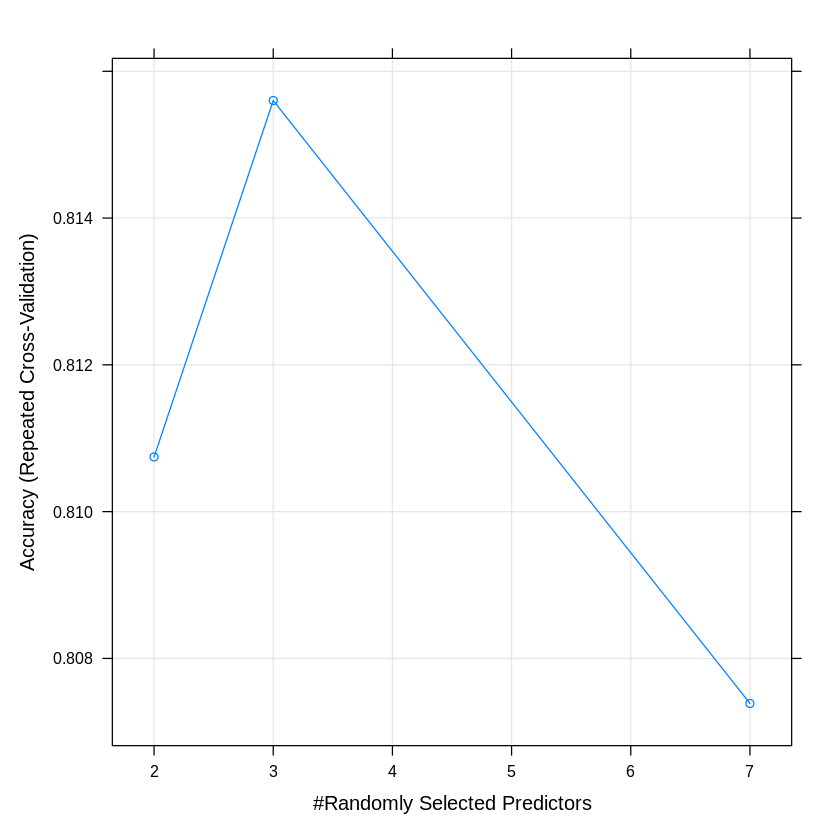

In [42]:
# Plot accuracy score vs #features

plot(RFmodel)




## **Confusion Matrix**

In [43]:
RFmodel$finalModel




Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.85%
Confusion matrix:
    0   1 class.error
0 511  38  0.06921676
1 121 221  0.35380117

## **Examining An RF Tree**

In [44]:
# Let's look at tree #392 (there are 500 of them!)

getTree(RFmodel$finalModel, 392, labelVar=TRUE)



,left daughter,right daughter,split var,split point,status,prediction
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
1,2,3,Sexmale,0.50000,1,NA
2,4,5,Fare,48.20000,1,NA
3,6,7,EmbarkedQ,0.50000,1,NA
4,8,9,SibSp,0.50000,1,NA
5,10,11,Parch,1.50000,1,NA
6,12,13,Pclass,1.50000,1,NA
7,14,15,Fare,7.78960,1,NA
8,16,17,Parch,4.00000,1,NA
9,18,19,EmbarkedC,0.50000,1,NA


### **Plotting Variable Importance**

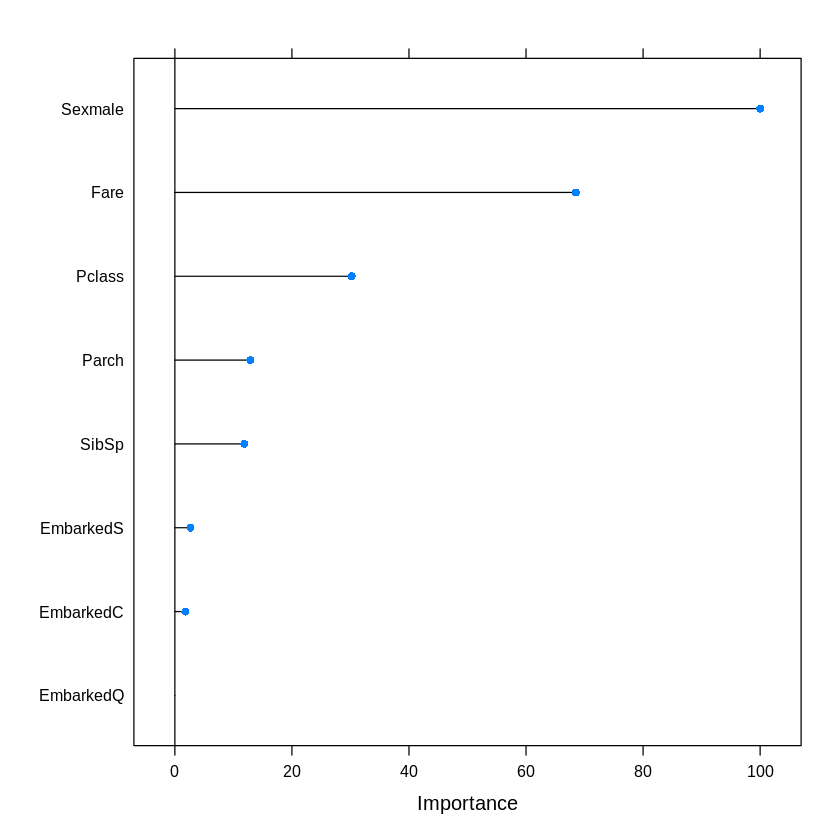

In [45]:
# Plotting variable importance

plot(varImp(RFmodel))




## **The Test Cases**

* Note the missing value for **Fare**

* We need to impute that one value before proceeding with the test

In [48]:
summary(testDF)



  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

In [49]:
# impute using  the mean value then verify

testDF$Fare <- ifelse(is.na(testDF$Fare), mean(testDF$Fare, na.rm = TRUE), testDF$Fare)


summary(testDF)




  PassengerId         Pclass          Name               Sex           
 Min.   : 892.0   Min.   :1.000   Length:418         Length:418        
 1st Qu.: 996.2   1st Qu.:1.000   Class :character   Class :character  
 Median :1100.5   Median :3.000   Mode  :character   Mode  :character  
 Mean   :1100.5   Mean   :2.266                                        
 3rd Qu.:1204.8   3rd Qu.:3.000                                        
 Max.   :1309.0   Max.   :3.000                                        
                                                                       
      Age            SibSp            Parch           Ticket         
 Min.   : 0.17   Min.   :0.0000   Min.   :0.0000   Length:418        
 1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median :27.00   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   :30.27   Mean   :0.4474   Mean   :0.3923                     
 3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.0000                     
 Max

## **Make Predictions**

*  We just have to call the **predict** method on the model object we  trained. 
* Let’s make the predictions on the test set and add them as a **new column**.



In [51]:
#  "1" stands for survived and "0" stands for died

testDF$Survived <- predict(RFmodel, newdata = testDF)

testDF$Survived




[1] 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 [38] 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 [75] 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
[112] 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
[149] 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
[186] 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
[223] 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
[260] 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
[297] 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
[334] 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
[371] 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
[408] 0 1 0 1 1 0 0 1 0 0 1
Levels: 0 1

# **References**

* https://www.kaggle.com/competitions/titanic/data
* https://cran.r-project.org/web/packages/randomForest/randomForest.pdf
* https://www.edureka.co/blog/random-forest-classifier/
* https://rpubs.com/aryn999/DecisionTreeusingR
* https://machinelearningmastery.com/tune-machine-learning-algorithms-in-r/








